In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cubewalkers as cw

In [3]:
ABA_rules="""
# Copied from https://github.com/jcrozum/pystablemotifs/blob/master/models/ABA.txt

# Parul Maheshwari et al. (2020) A Guard Cell Abscisic Acid (ABA) Network Model That Captures the Stomatal Resting State
# Supplementary Table S3
# Deleted self loops from Microtubule_Depolymerization, MPK9_12, CPK3_21, Vacuolar_Acidification
# ROP11 kept off, CPK6_23 kept on.

# Format
# / in node names were replaced by _
# space in node names were replaced by _
# + in node names were deleted
# α in node names were replaced by alpha
# δ in node names were replaced by delta

# Added ABA*=ABA because cubewalkers does not yet support implicit sources
ABA*=ABA
ABI1* = not PA and not RCARs and not ROS and pHc
ABI2* = not RCARs and not ROS and not PA
Actin_Reorganization* = not AtRAC1
AnionEM* = SLAC1 or (QUAC1 and SLAH3)
AtRAC1* = not ABA or ABI1
CIS* = InsP3_6 or cADPR
CPK3_21* = Ca2c
Ca2c* = (CaIM or CIS) and not Ca2_ATPase
CaIM* = Actin_Reorganization or GHR1
Ca2_ATPase* = Ca2c
Closure* = Microtubule_Depolymerization and H2O_Efflux
DAG* = PLC
Depolarization* = (AnionEM or Ca2c or KEV) and (not H_ATPase or not K_Efflux)
GHR1* = not ABI2 and ROS
H2O_Efflux* = AnionEM and OST1 and K_Efflux and not Malate
HAB1* = not RCARs and not ROS
H_ATPase* = not pHc and not Ca2c and not ROS
InsP3_6* = PLC
KEV* = Vacuolar_Acidification or Ca2c
KOUT* = (not NO or not ROS or pHc) and Depolarization
K_Efflux* = KEV and KOUT
MPK9_12* = Ca2c
Malate* = PEPC and not ABA and not AnionEM
Microtubule_Depolymerization* = TCTP
NIA1_2* = ROS
NO* = NIA1_2
cGMP* = NO
OST1* = (not ABI1 and not HAB1) or (not PP2CA and not ABI2) or (not ABI1 and not ABI2) or (not HAB1 and not PP2CA) or (not HAB1 and not ABI2) or (not ABI1 and not PP2CA)
PA* = PLDdelta or PLDalpha or DAG
PEPC* = not ABA
V-PPase* = ABA
PLC* = Ca2c
PLDalpha* = S1P and Ca2c
PLDdelta* = NO or ROS
PP2CA* = not RCARs and not ROS
QUAC1* = OST1 and Ca2c
ROS* = pHc and not ABI1 and OST1 and S1P and PA
RCARs* = ABA
SLAC1* = MPK9_12 and OST1 and GHR1 and not ABI1 and not PP2CA and not ABI2 and pHc
SLAH3* = CPK3_21 and not ABI1
S1P* = PA or ABA
TCTP* = Ca2c
V-ATPase* = Ca2c
Vacuolar_Acidification* = V-PPase or V-ATPase
cADPR* = cGMP and ROS and NO
pHc* = ((OST1 and not ABI2 and not ABI1) or Ca2c) and Vacuolar_Acidification"""

In [4]:
initial_biases = """
# Parul Maheshwari et al. (2020) A Guard Cell Abscisic Acid (ABA) Network Model That Captures the Stomatal Resting State
# Supplementary Table S2
Closure, 0
H2O_Efflux, 0
Microtubule_Depolymerization, 0
Ca2_ATPase, 0
RCARs, 0 
pHc, 0
Ca2c, 0
K_Efflux, 0
CIS, 0
Vacuolar_Acidification, 0
PLDalpha, 0
NIA1_2, 0
CPK3_21, 0
MPK9_12, 0
NO, 0
CaIM,0 
PA, 0
Actin_Reorganization, 0
S1P, 0
cGMP, 0
ROS, 0
InsP3_6, 0
OST1,0
Malate, 1
H_ATPase, 1
ABI1, 1
ABI2, 1
HAB1, 1
PP2CA, 1
ABA, 1
"""

In [5]:
ABA_model = cw.Model(ABA_rules,
                     n_walkers=1000, 
                     n_time_steps=2000,
                     initial_biases=initial_biases)

In [6]:
ABA_model.simulate_ensemble(maskfunction=cw.update_schemes.asynchronous, 
                            averages_only=True)

In [7]:
closure_index = ABA_model.vardict['Closure']
closure_timeseries = ABA_model.trajectories[:,closure_index]

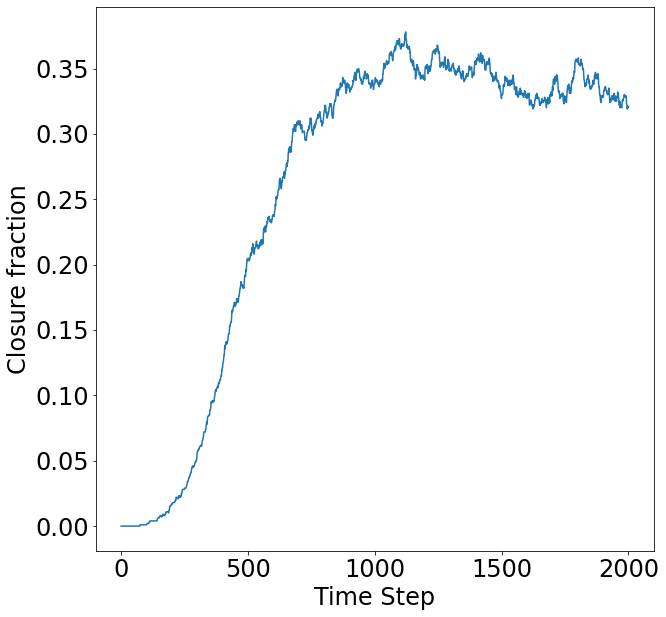

In [8]:
fontsize=24
fig,ax = plt.subplots(figsize=(10,10),facecolor='white')
ax.plot(closure_timeseries.get())
ax.set_xlabel('Time Step',fontsize=fontsize)
ax.set_ylabel('Closure fraction',fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)


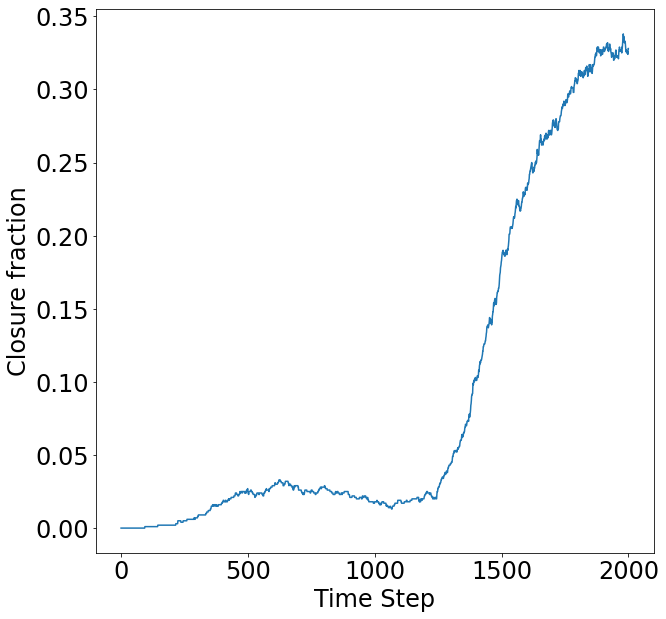

In [13]:
experiment = """
ABA,0,1000,0
ABA,1001,inf,1
"""

ABA_experiment = cw.Experiment(experiment)
ABA_model_2 = cw.Model(ABA_rules,
                       experiment=ABA_experiment,
                       n_walkers=1000, 
                       n_time_steps=2000,
                       initial_biases=initial_biases)
ABA_model_2.simulate_ensemble(maskfunction=cw.update_schemes.asynchronous, 
                              averages_only=True)
controlled_closure_timeseries = ABA_model_2.trajectories[:,ABA_model_2.vardict['Closure']]

fontsize=24
fig,ax = plt.subplots(figsize=(10,10),facecolor='white')
ax.plot(controlled_closure_timeseries.get())
ax.set_xlabel('Time Step',fontsize=fontsize)
ax.set_ylabel('Closure fraction',fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

In [51]:
ABA_rules_PBN="""
ABI1* = not PA and not RCARs and not ROS and pHc
ABI2* = not RCARs and not ROS and not PA
Actin_Reorganization* = not AtRAC1
AnionEM* = SLAC1 or (QUAC1 and SLAH3)
AtRAC1* = not ABA or ABI1
CIS* = InsP3_6 or cADPR
CPK3_21* = Ca2c
Ca2c* = (CaIM or CIS) and not Ca2_ATPase
CaIM* = Actin_Reorganization or GHR1
Ca2_ATPase* = Ca2c
Closure* = Microtubule_Depolymerization and H2O_Efflux
DAG* = PLC
Depolarization* = (AnionEM or Ca2c or KEV) and (not H_ATPase or not K_Efflux)
GHR1* = not ABI2 and ROS
H2O_Efflux* = AnionEM and OST1 and K_Efflux and not Malate
HAB1* = not RCARs and not ROS
H_ATPase* = not pHc and not Ca2c and not ROS
InsP3_6* = PLC
KEV* = Vacuolar_Acidification or Ca2c
KOUT* = (not NO or not ROS or pHc) and Depolarization
K_Efflux* = KEV and KOUT
MPK9_12* = Ca2c
Malate* = PEPC and not ABA and not AnionEM
Microtubule_Depolymerization* = TCTP
NIA1_2* = ROS
NO* = NIA1_2
cGMP* = NO
OST1* = (not ABI1 and not HAB1) or (not PP2CA and not ABI2) or (not ABI1 and not ABI2) or (not HAB1 and not PP2CA) or (not HAB1 and not ABI2) or (not ABI1 and not PP2CA)
PA* = PLDdelta or PLDalpha or DAG
PEPC* = not ABA
V-PPase* = ABA
PLC* = Ca2c
PLDalpha* = S1P and Ca2c
PLDdelta* = NO or ROS
PP2CA* = not RCARs and not ROS
QUAC1* = OST1 and Ca2c
ROS* = pHc and not ABI1 and OST1 and S1P and PA
RCARs* = ABA
SLAC1* = MPK9_12 and OST1 and GHR1 and not ABI1 and not PP2CA and not ABI2 and pHc
SLAH3* = CPK3_21 and not ABI1
S1P* = PA or ABA
TCTP* = Ca2c
V-ATPase* = Ca2c
Vacuolar_Acidification* = V-PPase or V-ATPase
cADPR* = cGMP and ROS and NO
pHc* = ((OST1 and not ABI2 and not ABI1) or Ca2c) and Vacuolar_Acidification
ABA* = ABA & (0<<=0.95) | 0 & (0.95<<=1)
"""

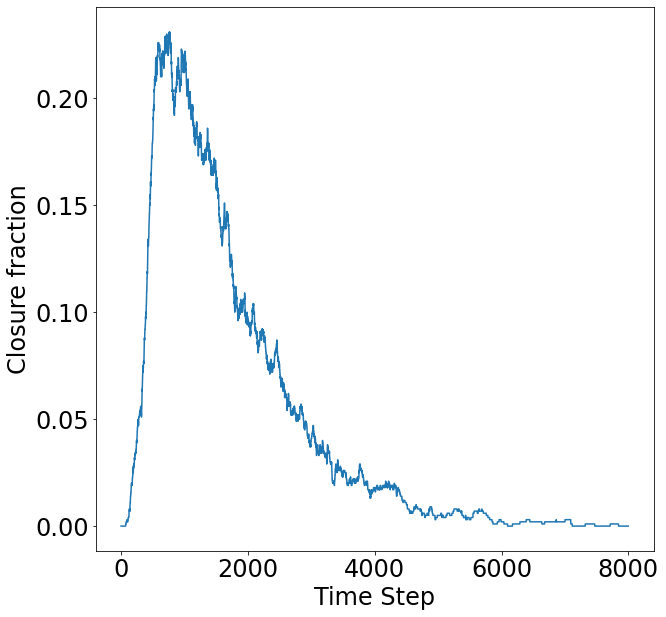

In [52]:

ABA_model_3 = cw.Model(ABA_rules_PBN,
                       n_walkers=1000, 
                       n_time_steps=8000,
                       initial_biases=initial_biases)
ABA_model_3.simulate_ensemble(maskfunction=cw.update_schemes.asynchronous_PBN, 
                              averages_only=True)
perturbed_closure_timeseries = ABA_model_3.trajectories[:,ABA_model_3.vardict['Closure']]

fontsize=24
fig,ax = plt.subplots(figsize=(10,10),facecolor='white')
ax.plot(perturbed_closure_timeseries.get())
ax.set_xlabel('Time Step',fontsize=fontsize)
ax.set_ylabel('Closure fraction',fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)